In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
titanic = pd.read_csv('train.csv', sep=',')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def pie_chart(feature):
  feature_ratio = titanic[feature].value_counts()
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  survived = titanic[titanic.Survived == 1][feature].value_counts()
  dead = titanic[titanic.Survived == 0][feature].value_counts()

  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.show()

  for i, index in enumerate(feature_index):
    plt.subplot(1, feature_size + 1, i+1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')

  plt.show()

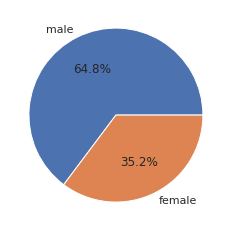

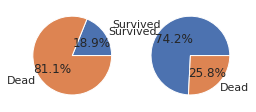

In [ ]:
# 성별에 따른 생존 비율
pie_chart('Sex')

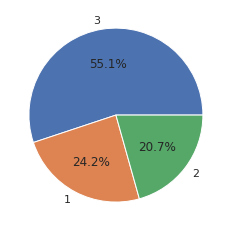

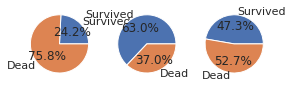

In [ ]:
# 좌석 클래스에 따른 생존 비율
pie_chart('Pclass')

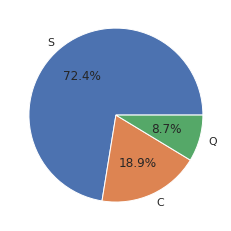

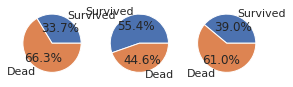

In [ ]:
# 탑승한 선착장 위치에 따른 생존 비율
pie_chart('Embarked')

In [ ]:
# 가족이 있는 그룹
titanic_family = titanic[(titanic.SibSp > 0) | (titanic.Parch > 0)]

titanic_family["FamilyExist"] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# 가족이 없는 그룹
titanic_non_family = titanic[(titanic.SibSp == 0) & (titanic.Parch == 0)]

titanic_non_family["FamilyExist"] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# 가족이 있는그룹과 없는 그룹을 합친다.
titanic_total = pd.concat([titanic_non_family, titanic_family], ignore_index=True)

In [ ]:
titanic_total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyExist
0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
2,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [ ]:
# 형제자매, 배우자 + 부모 + 자신 => 총 자기 가족 을 구한다.
titanic_total["FamilySize"] = titanic_total.SibSp + titanic_total.Parch + 1

In [ ]:
low_fare = titanic_total["Fare"] < 15
medium_fare = (titanic_total["Fare"] >= 15) & (titanic_total["Fare"] < 30 )
high_fare = titanic_total["Fare"] >= 30

In [ ]:
# 남성과 여성을 0과 1로 변환
titanic_total.loc[titanic_total.Sex == "male", "Sex"] = 0
titanic_total.loc[titanic_total.Sex == "female", "Sex"] = 1

In [ ]:
titanic_total["Fare"] = pd.to_numeric(titanic_total["Fare"])

In [ ]:
titanic_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilyExist  891 non-null    int64  
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [ ]:
# # fare 삭제 및 추가

titanic_total.loc[titanic_total.Fare < 15, "LowFare"] = "low_fare"
titanic_total.loc[titanic_total.Fare >= 15, "Fare"] = "medium_fare"
titanic_total.loc[titanic_total.Fare >= 30, "Fare"] = "high_fare"

TypeError: ignored